In [16]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import datetime as dt

In [17]:
data = pd.read_csv("/Users/temidayo/downloads/Amdari/Dataset_ecommerce.csv")

In [18]:
data.describe(include= "all")

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
count,541909,541909,406829.000000,541909,541909,541909.000000,541909.000000,541909
unique,25900,23260,NaN,9000,10,NaN,NaN,28
top,573585,2011-10-31 14:41:00,NaN,SC2014,Sports Equipment,NaN,NaN,Cote d'Ivoire
freq,1114,1114,NaN,96,54765,NaN,NaN,19651
mean,NaN,NaN,15287.690570,NaN,NaN,50.534748,50.476354,NaN
std,NaN,NaN,1713.600303,NaN,NaN,28.849367,28.564775,NaN
min,NaN,NaN,12346.000000,NaN,NaN,1.000000,1.000000,NaN
25%,NaN,NaN,13953.000000,NaN,NaN,26.000000,25.750000,NaN
50%,NaN,NaN,15152.000000,NaN,NaN,51.000000,50.430000,NaN
75%,NaN,NaN,16791.000000,NaN,NaN,76.000000,75.180000,NaN


In [19]:
data.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda


In [20]:
data.isnull().sum()

InvoiceNo           0
InvoiceDate         0
CustomerID     135080
StockCode           0
Description         0
Quantity            0
UnitPrice           0
Country             0
dtype: int64

In [26]:
data.dropna(inplace = True)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   InvoiceDate  406829 non-null  datetime64[ns]
 2   CustomerID   406829 non-null  float64       
 3   StockCode    406829 non-null  object        
 4   Description  406829 non-null  object        
 5   Quantity     406829 non-null  int64         
 6   UnitPrice    406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [28]:
data["InvoiceDate"]= pd.to_datetime(data["InvoiceDate"])

In [ ]:
#EDA

In [38]:
quantity_by_country = data.groupby(["Country"])["Quantity"].sum().reset_index()
quantity_by_country = quantity_by_country.sort_values("Quantity", ascending = False).reset_index()

In [39]:
quantity_by_country.head(2)

,index,Country,Quantity
0,23,Togo,741223
1,20,South Africa,740589


**Exploratory Data Analysis**

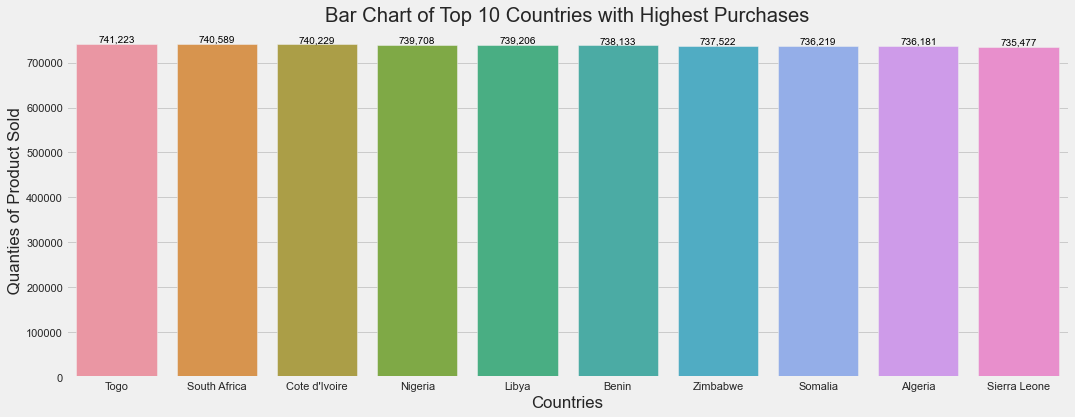

In [46]:
#Visualize top 10 countries

top_10_country = quantity_by_country.head(10)

plt.figure(figsize = (16, 6))

ax =sns.barplot(x = "Country", y = "Quantity", data= top_10_country)

plt.xlabel("Countries")
plt.ylabel(" Quanties of Product Sold")
plt.title("Bar Chart of Top 10 Countries with Highest Purchases")
plt.style.use('fivethirtyeight')

for bar in ax.patches:
    ax.annotate(
        f"{bar.get_height():,.0f}",  # Display value with commas
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),  # Position on top of each bar
        ha='center', va='bottom', fontsize=10, color='black'
    )

plt.show()


In [49]:
# country with the Highest Customer
country_to_customer = data.groupby(["Country"])["CustomerID"].nunique().reset_index()
country_to_customer = country_to_customer.sort_values("CustomerID", ascending = False).reset_index()

In [51]:
country_to_customer.head(3)

,index,Country,CustomerID
0,13,Mozambique,3072
1,1,Benin,3054
2,23,Togo,3053


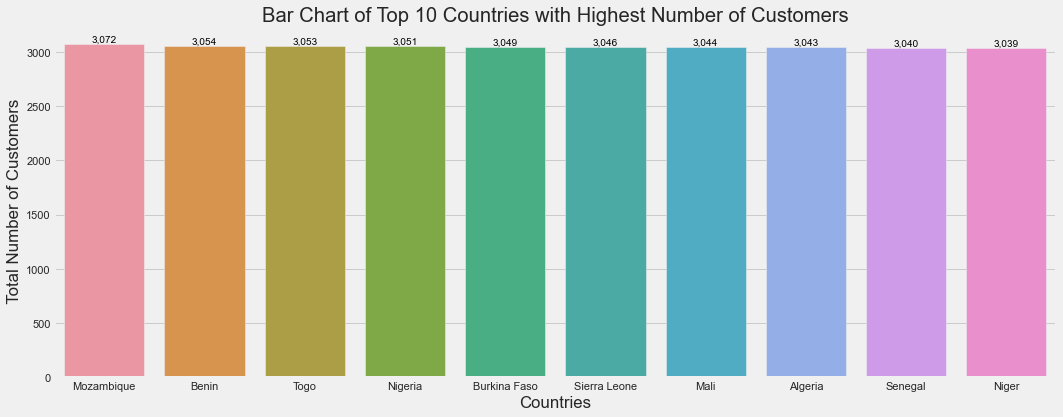

In [56]:
top_10_country_to_customer = country_to_customer.head(10)

plt.figure(figsize = (16, 6))

ax =sns.barplot(x = "Country", y = "CustomerID", data= top_10_country_to_customer)

plt.xlabel("Countries")
plt.ylabel(" Total Number of Customers")
plt.title("Bar Chart of Top 10 Countries with Highest Number of Customers")
plt.style.use('fivethirtyeight')

for bar in ax.patches:
    ax.annotate(
        f"{bar.get_height():,.0f}",  # Display value with commas
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),  # Position on top of each bar
        ha='center', va='bottom', fontsize=10, color='black'
    )

plt.show()


**Sales trend Analysis**

In [60]:
monthly_sales = data.groupby(data["InvoiceDate"].dt.to_period("M"))["Quantity"].sum()

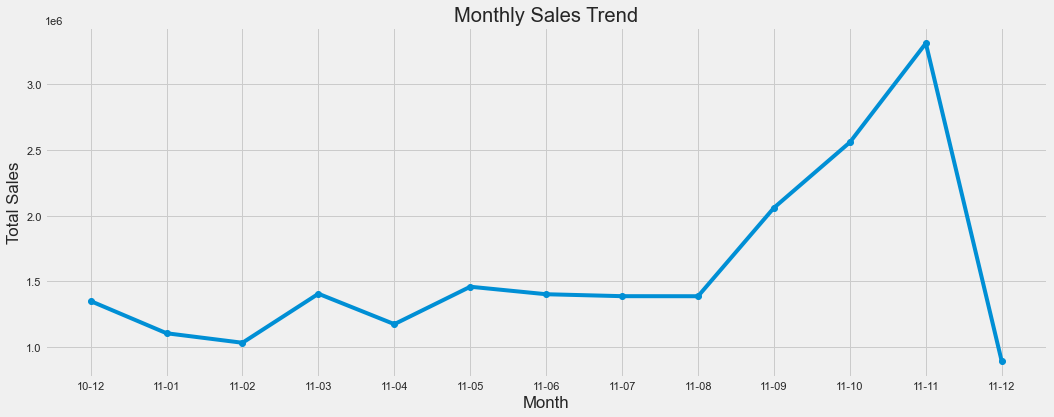

In [65]:
plt.figure(figsize = (16,6))
plt.plot(monthly_sales.index.strftime("%y-%m"),monthly_sales.values, marker= "o", linestyle = "-")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.title( "Monthly Sales Trend")
plt.grid(True)

plt.show()

**Cohort Analysis**

In [66]:
data.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda


In [67]:
def get_month(x):
    return dt.datetime(x.year, x.month, 1)

In [68]:
data["InvoiceDate"] = data["InvoiceDate"].apply(get_month)

In [69]:
data.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01,17850.0,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01,17850.0,SC6228,Toys,15,24.73,South Africa
4,536365,2010-12-01,17850.0,SC2149,Toys,50,38.83,Rwanda


In [77]:
def get_cohort_date(data):
    data["CohortDate"]= data.groupby("CustomerID")["InvoiceDate"].transform("min")
    return data["CohortDate"]

In [78]:
data["CohortDate"] = get_cohort_date(data)

In [79]:
data

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,CohortDate
0,536365,2010-12-01,17850.0,SC1734,Electronics,65,10.23,Egypt,2010-12-01
1,536365,2010-12-01,17850.0,SC2088,Furniture,95,19.61,Mali,2010-12-01
2,536365,2010-12-01,17850.0,SC3463,Books,78,61.49,Mali,2010-12-01
3,536365,2010-12-01,17850.0,SC6228,Toys,15,24.73,South Africa,2010-12-01
4,536365,2010-12-01,17850.0,SC2149,Toys,50,38.83,Rwanda,2010-12-01
...,...,...,...,...,...,...,...,...,...
541904,581587,2011-12-01,12680.0,SC5440,Furniture,25,36.53,Mozambique,2011-08-01
541905,581587,2011-12-01,12680.0,SC3576,Cloths,94,90.65,Tunisia,2011-08-01
541906,581587,2011-12-01,12680.0,SC5283,Furniture,14,40.07,Somalia,2011-08-01
541907,581587,2011-12-01,12680.0,SC1099,Cosmetics,45,79.83,Senegal,2011-08-01


# Cohort Index

In [80]:
def get_year_and_month (data, col):
    month= data[col].dt.month
    year= data[col].dt.year
    return month,year

In [81]:
first_month, first_year = get_year_and_month (data, "CohortDate")

In [82]:
first_month

0         12
1         12
2         12
3         12
4         12
          ..
541904     8
541905     8
541906     8
541907     8
541908     8
Name: CohortDate, Length: 406829, dtype: int64

In [83]:
first_year

0         2010
1         2010
2         2010
3         2010
4         2010
          ... 
541904    2011
541905    2011
541906    2011
541907    2011
541908    2011
Name: CohortDate, Length: 406829, dtype: int64

In [84]:
latest_month, latest_year = get_year_and_month (data, "InvoiceDate")

In [85]:
latest_month

0         12
1         12
2         12
3         12
4         12
          ..
541904    12
541905    12
541906    12
541907    12
541908    12
Name: InvoiceDate, Length: 406829, dtype: int64

In [86]:
latest_year

0         2010
1         2010
2         2010
3         2010
4         2010
          ... 
541904    2011
541905    2011
541906    2011
541907    2011
541908    2011
Name: InvoiceDate, Length: 406829, dtype: int64

In [87]:
def create_cohort_index (first_month, first_year, latest_month, latest_year):
    year_diff = latest_year - first_year
    month_diff = latest_month - first_month
    index = year_diff * 12 + month_diff + 1
    return index


In [88]:
data["CohortIndex"] = create_cohort_index (first_month, first_year, latest_month, latest_year)

In [89]:
data

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,CohortDate,CohortIndex
0,536365,2010-12-01,17850.0,SC1734,Electronics,65,10.23,Egypt,2010-12-01,1
1,536365,2010-12-01,17850.0,SC2088,Furniture,95,19.61,Mali,2010-12-01,1
2,536365,2010-12-01,17850.0,SC3463,Books,78,61.49,Mali,2010-12-01,1
3,536365,2010-12-01,17850.0,SC6228,Toys,15,24.73,South Africa,2010-12-01,1
4,536365,2010-12-01,17850.0,SC2149,Toys,50,38.83,Rwanda,2010-12-01,1
...,...,...,...,...,...,...,...,...,...,...
541904,581587,2011-12-01,12680.0,SC5440,Furniture,25,36.53,Mozambique,2011-08-01,5
541905,581587,2011-12-01,12680.0,SC3576,Cloths,94,90.65,Tunisia,2011-08-01,5
541906,581587,2011-12-01,12680.0,SC5283,Furniture,14,40.07,Somalia,2011-08-01,5
541907,581587,2011-12-01,12680.0,SC1099,Cosmetics,45,79.83,Senegal,2011-08-01,5


# Cohort Table

In [93]:
cohort_info = data.groupby(["CohortDate", "CohortIndex" ])["CustomerID"].nunique().reset_index()

In [95]:
cohort_info.rename(columns = {"CustomerID" : "NumberOfCustomer"}, inplace = True)

In [96]:
cohort_info

,CohortDate,CohortIndex,NumberOfCustomer
0,2010-12-01,1,948
1,2010-12-01,2,362
2,2010-12-01,3,317
3,2010-12-01,4,367
4,2010-12-01,5,341
...,...,...,...
86,2011-10-01,2,93
87,2011-10-01,3,46
88,2011-11-01,1,321
89,2011-11-01,2,43


In [97]:
cohort_table = cohort_info.pivot(index = "CohortDate", columns = ["CohortIndex"], values = "NumberOfCustomer" )

In [99]:
cohort_table.index = cohort_table.index.strftime("%B %Y")

In [100]:
cohort_table

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortDate,,,,,,,,,,,,,
December 2010,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
January 2011,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
February 2011,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
March 2011,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
April 2011,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
May 2011,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
June 2011,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
July 2011,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
August 2011,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='CohortIndex', ylabel='CohortDate'>

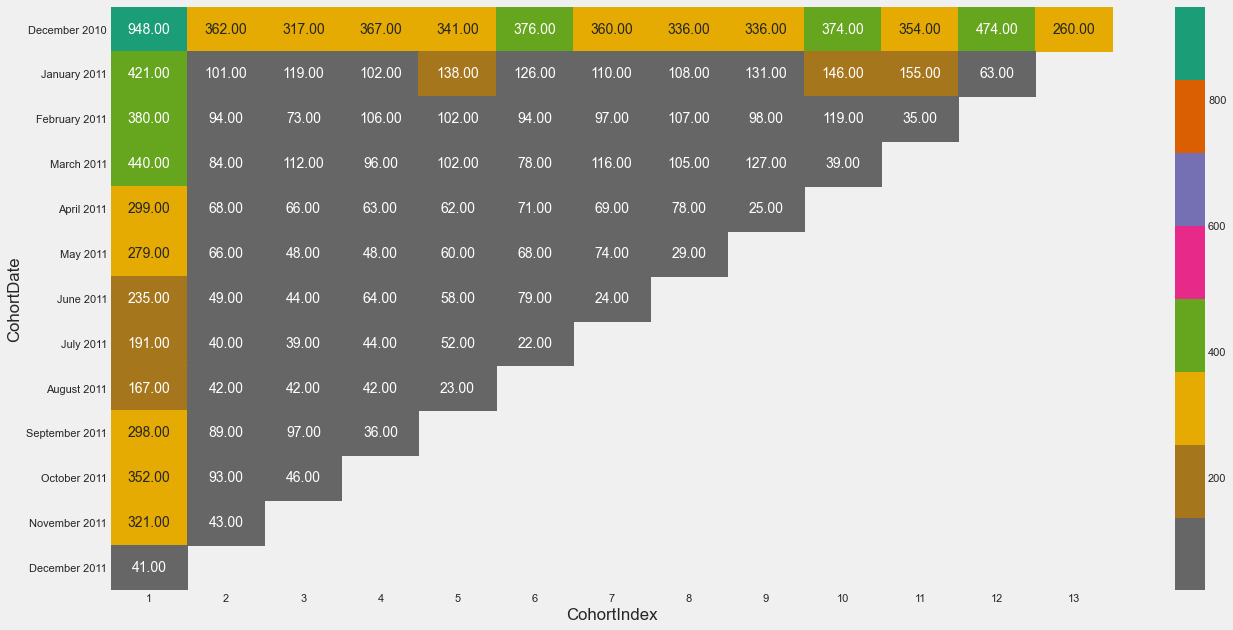

In [102]:
plt.figure(figsize=(20,10))
sns.heatmap(cohort_table, annot =True, cmap= "Dark2_r", fmt = ".2f")


In [103]:
new_cohort_table = cohort_table.divide(cohort_table.iloc[:,0], axis = 0)new_cohort_table = cohort_table.divide(cohort_table.iloc[:,0], axis = 0)

<AxesSubplot:xlabel='CohortIndex', ylabel='CohortDate'>

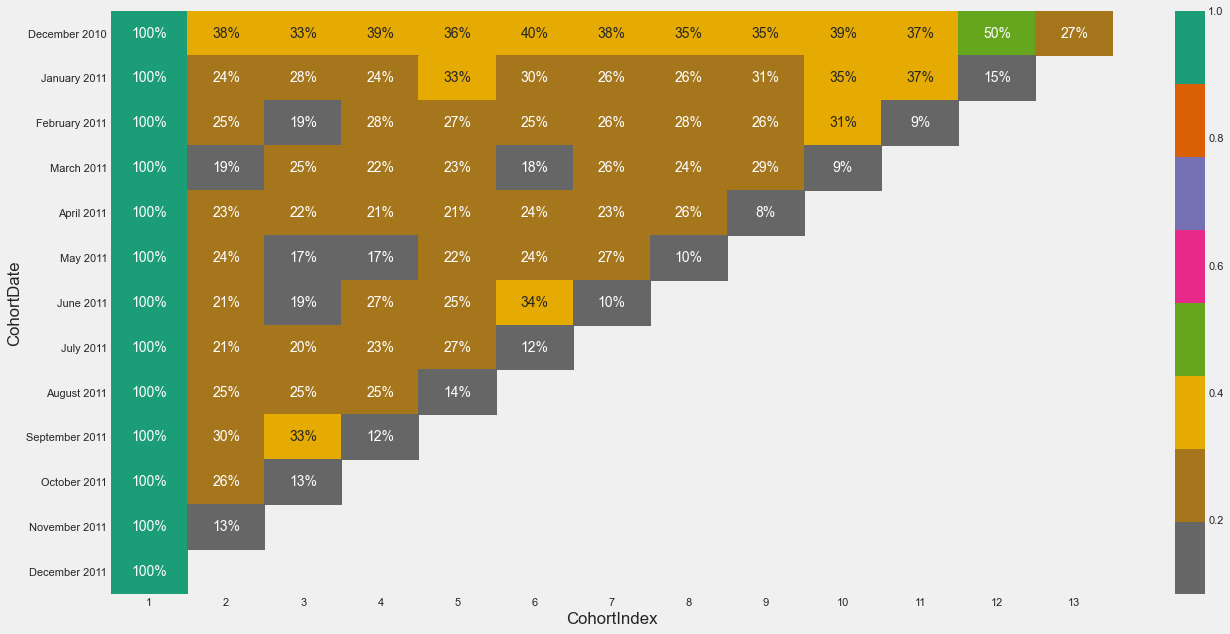

In [106]:
plt.figure(figsize=(20,10))
sns.heatmap(new_cohort_table, annot =True, cmap= "Dark2_r", fmt = ".0%")

**Quantity Bought**

In [127]:
quantity_bought = data.groupby(["CohortDate", "CohortIndex" ])["Quantity"].sum().reset_index()

In [128]:
quantity_bought

,CohortDate,CohortIndex,Quantity
0,2010-12-01,1,1350834
1,2010-12-01,2,546873
2,2010-12-01,3,462374
3,2010-12-01,4,613244
4,2010-12-01,5,510943
...,...,...,...
86,2011-10-01,2,181888
87,2011-10-01,3,44776
88,2011-11-01,1,574330
89,2011-11-01,2,56021


In [129]:
quantity_table = quantity_bought.pivot(index = "CohortDate", columns = ["CohortIndex"] , values = "Quantity")

In [130]:
quantity_table.index = quantity_table.index.strftime("%B %Y")

In [131]:
quantity_table

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortDate,,,,,,,,,,,,,
December 2010,1350834.0,546873.0,462374.0,613244.0,510943.0,636443.0,597676.0,604504.0,600481.0,757806.0,725896.0,1165046.0,375469.0
January 2011,559013.0,121074.0,155931.0,120023.0,194675.0,166585.0,144835.0,149848.0,200661.0,258400.0,330607.0,76504.0,NaN
February 2011,450020.0,74008.0,98850.0,122918.0,111386.0,104214.0,108442.0,135276.0,151180.0,145405.0,21787.0,NaN,NaN
March 2011,563434.0,74215.0,125519.0,119480.0,122078.0,107554.0,139852.0,182259.0,212009.0,49685.0,NaN,NaN,NaN
April 2011,371021.0,71541.0,66410.0,65115.0,70639.0,105065.0,97319.0,110572.0,27119.0,NaN,NaN,NaN,NaN
May 2011,308885.0,55453.0,44637.0,45690.0,76473.0,118534.0,97156.0,41183.0,NaN,NaN,NaN,NaN,NaN
June 2011,285867.0,47847.0,35516.0,76483.0,88504.0,127400.0,31264.0,NaN,NaN,NaN,NaN,NaN,NaN
July 2011,254889.0,25983.0,68721.0,69466.0,91529.0,26831.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
August 2011,243542.0,80156.0,144849.0,141888.0,45405.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='CohortIndex', ylabel='CohortDate'>

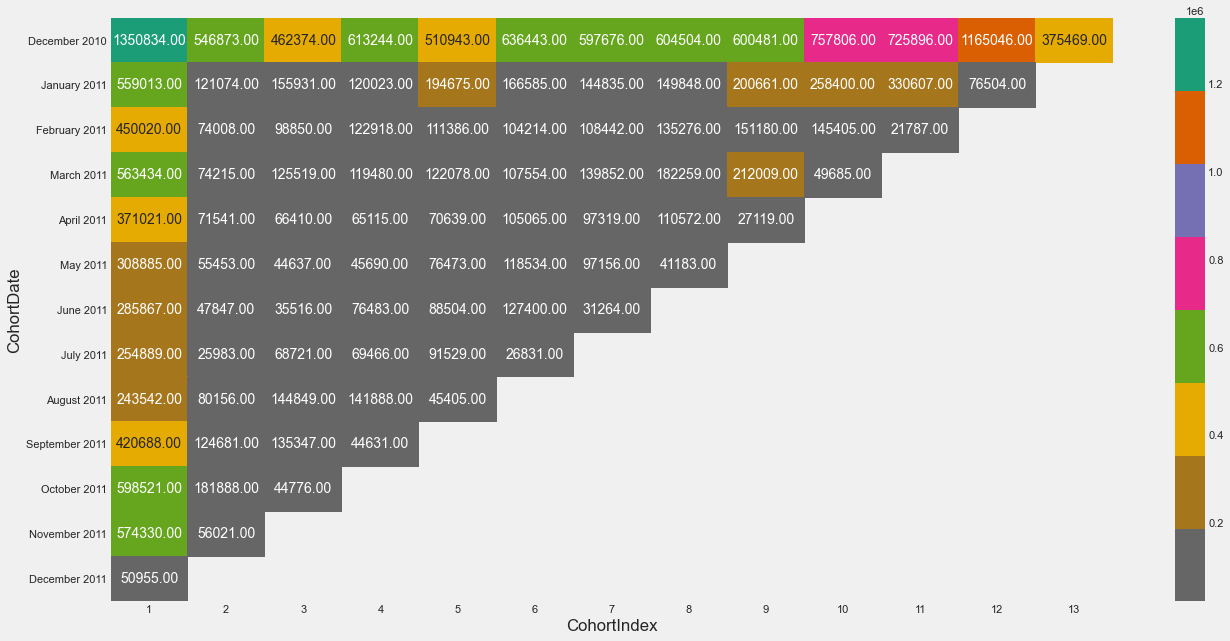

In [132]:
plt.figure(figsize=(20,10))
sns.heatmap(quantity_table, annot =True, cmap= "Dark2_r", fmt = ".2f")